In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data= pd.read_csv("/home/libra/Desktop/Program02/insurance_price_prediction/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [8]:
data['sex'].unique()

array([0, 1])

In [9]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [10]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [12]:
data.sample(4)

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.36,0,0,4,25656.57526
424,48,1,30.20,2,0,1,8968.33000
930,26,1,46.53,1,0,2,2927.06470
634,51,1,39.70,1,0,1,9391.34600


In [13]:
X=data.drop(['charges'],axis=1)

In [14]:
X.sample(3)

,age,sex,bmi,children,smoker,region
888,22,1,39.50,0,0,1
237,31,1,38.39,2,0,2
357,47,1,29.83,3,0,3


In [15]:
y=data['charges']

In [16]:
from sklearn.model_selection import train_test_split

/home/libra/.local/lib/python3.8/site-packages/sklearn/utils/multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
y_train


560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [19]:
np.float = float    
np.bool = bool    
np.int = int    
np.object = object    



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

/home/libra/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/libra/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/libra/.local/lib/python3.8/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
lr= LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [22]:
y_pred1= lr.predict(X_test)
y_pred2= svm.predict(X_test)
y_pred3= rf.predict(X_test)
y_pred4= gbr.predict(X_test)

df=pd.DataFrame({'Actual':y_test,"LinerReg":y_pred1,'SVM':y_pred2,'RandomF':y_pred3,'GradBoostReg':y_pred4})

In [23]:
df.head()

,Actual,LinerReg,SVM,RandomF,GradBoostReg
764,9095.06825,8924.407244,9569.802816,10523.318625,11001.128629
887,5272.17580,7116.295018,9566.795778,5217.209200,5840.174656
890,29330.98315,36909.013521,9578.903947,27565.643025,28001.980112
1293,9301.89355,9507.874691,9571.732331,9964.071420,9745.291602
259,33750.29180,27013.350008,9567.472375,34529.184976,33639.100981


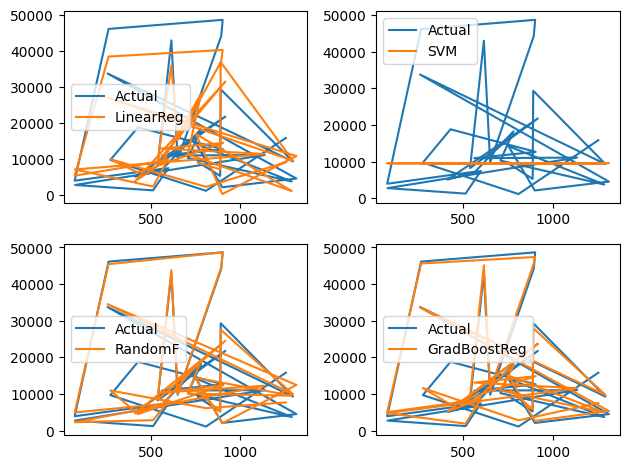

In [24]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:31],label='Actual')
plt.plot(df['LinerReg'].iloc[0:31],label='LinearReg')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:31],label='Actual')
plt.plot(df['SVM'].iloc[0:31],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:31],label='Actual')
plt.plot(df['RandomF'].iloc[0:31],label='RandomF')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:31],label='Actual')
plt.plot(df['GradBoostReg'].iloc[0:31],label='GradBoostReg')
plt.tight_layout()
plt.legend()

# Models R2 Score


In [25]:
from sklearn import metrics

In [26]:
score1= metrics.r2_score(y_test,y_pred1)
score2= metrics.r2_score(y_test,y_pred2)
score3= metrics.r2_score(y_test,y_pred3)
score4= metrics.r2_score(y_test,y_pred4)

print(score1)
print(score2)
print(score3)
print(score4)

0.7833463107364539
-0.07400685948932795
0.8513532154995895
0.8779726251291786


In [27]:
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)

print(s1)
print(s2)
print(s3)
print(s4)

4186.508898366434
8638.30701633208
2488.7859774875624
2447.951558054584


In [28]:
#New dataframe
data1={ 
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
}

df1=pd.DataFrame(data1,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [29]:
new_pred=gbr.predict(df1)
print(new_pred)

[43839.34586293]


# Saving Model using Joblib

In [30]:
gbr=GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [31]:
import joblib

In [32]:
joblib.dump(gbr,'gbr_model')

['gbr_model']

In [33]:
model=joblib.load('gbr_model')

In [34]:
model.predict(df1)

array([42148.361888])

# GUI

In [35]:
from tkinter import *

In [36]:
import joblib

In [58]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model=joblib.load('gbr_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text="Insurance Cost",).grid(row=8)
    Label(master, text=result,bg='aqua').grid(row=9)



master= Tk()
master.title("Insurance Cost Prediction")
label= Label(master,text="Insurance Cost Prediction",bg='#856ff8',fg='white').grid(row=0,columnspan=2)
Label(master,text="Enter your Age",bg='aqua').grid(row=1)
Label(master,text="Male or Female [1/0]",bg='aqua').grid(row=2)
Label(master,text="Enter your BMI",bg='aqua').grid(row=3)
Label(master,text="Enter the number of children",bg='aqua').grid(row=4)
Label(master,text="Smoker yes/no [1/0]",bg='aqua').grid(row=5)
Label(master,text="Enter your Region [1-4]",bg='aqua').grid(row=6)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="Predict",command=show_entry,bg='green').grid()



master.configure(bg='aqua')

master.mainloop()